# Support Vector Regression (Priyanshu)

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing DataSet & defining them

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
X = dataset.iloc[:, 1: -1].values # we are commanding to take all the columns starting from 1st before last
# So X is a 2D array

y = dataset.iloc[:, -1].values # we are commanding to take onle last columns
# So, y is 1D array

In [4]:
y = y.reshape(len(y), 1) # as reshape(rows, columns)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [5]:
# in scikit-learn : Library, preprocessing module is present from which StandardScaler class is imported
from sklearn.preprocessing import StandardScaler  # it take input in the form of 2D array

# We need to make separate object for x & y 
# otherwise the object will got confuse to know which data we take mean

sc_x = StandardScaler() # to take input X_train
sc_y = StandardScaler() # to give output y

X = sc_x.fit_transform(X)
y = sc_y.fit_transform(y)

In [6]:
print(X) # value of 'X' after feature Scaling

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [7]:
print(y) # value of 'y' after feature Scaling

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


# Training The SVR model on whole DataSet

In [8]:
from sklearn.svm import SVR

#Creating SVR model with 'RBF' function
regressor = SVR(kernel = 'rbf') 
regressor.fit(X, y)

/Users/priyanshupulak/anaconda3/envs/new_environment/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a New Result

### Method 1

In [9]:

# sc_y.inverse_transform --> converts the feature data to normal form
# We use reshape(-1, 1) to avoid format error
# regressor.predict(sc_x.transform()) --> to predict the value at '6.5'
# we use sc_x --> as there is feature scaling


sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1, 1))


array([[170370.0204065]])

### Method 2

In [10]:
y_pred = regressor.predict(sc_x.transform([[6.5]]))
np.set_printoptions(precision = 2)
y_pred
# Getting the feature Scaling value of y_pred

array([-0.28])

In [11]:
y_pred = y_pred.reshape(len(y_pred),1) # As inverse_transform function requires 2D as input
y_pred = sc_y.inverse_transform(y_pred)
y_pred

array([[170370.02]])

## Visualising the SVR result

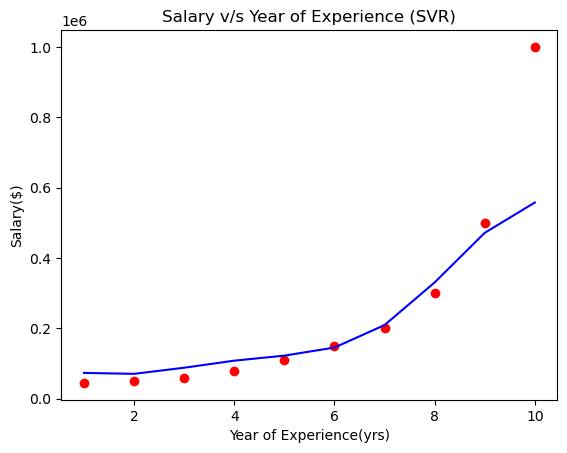

In [12]:
plt.scatter(sc_x.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')

plt.plot(sc_x.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1, 1)), color = 'blue')
# as sc_x is alreaday transform so we need not to transform again while using for sc_y

plt.title('Salary v/s Year of Experience (SVR)')
plt.xlabel('Year of Experience(yrs)')
plt.ylabel('Salary($)')
plt.show()

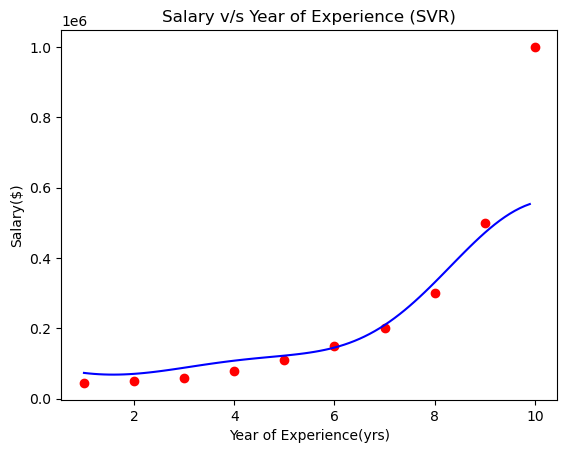

In [13]:
X_grid = np.arange(min(sc_x.inverse_transform(X)), max(sc_x.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_x.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_x.transform(X_grid)).reshape(-1, 1)), color = 'blue')
plt.title('Salary v/s Year of Experience (SVR)')
plt.xlabel('Year of Experience(yrs)')
plt.ylabel('Salary($)')
plt.show()